<img src="https://img.kaikeba.com/web/hcTech/img_logo.png" alt="图片替换文本" width="500" height="150" align="bottom" />

# 1 Assignment 2

## 1.1 复习上课内容以及复现课程代码

在本部分，你需要复习上课内容和课程代码后，自己复现课程代码。

#  2 回答一下理论题目

##  2.1  What does a neuron compute?

##   2.2 Why we use non-linear activation funcitons in neural networks?


##  2.3  What is the 'Logistic Loss' ?

##  2.4  Why we don't use zero initialization for all parameters ?

##  2.5 Can you implement the softmax function using python ? (选做，自行搜索资料)

# 3 实践题

## 3.1 自己动手发明一个TensorFlow框架，自己命名为**。

> 思路    
- class Node : 建立一个Node类抽象表示所有的普通节点，类似神经网络，每个节点有输入 inputs、输出 outputs、有前向传播 forward()、反向传播backward()的过程。   
> > 每个节点有多个输入    
>> 每个节点会有一个输出    
>>  每个节点将最终计算出一个表示输出的值。将 value 初始化为 None，表示该值存在，但是没有设定。    
>> 为前向计算和反向计算过程添加占位符     
- class Input (Node): 存放了一个value，value是数据特征和模型参数。变量 value 可以被明确地设置，也可以用 forward() 方法进行设置。该值会传递给神经网络的其他节点。
- class Add (Node): 是 Node 的一个子类，进行加法计算。
- class Linear(Node): **请你完成此部分**，该部分包含线性方程的前向传播和反向传播，线性方程 $ y = w_i*x_i + b $，weights：$w_i$， bias：$b$。
- class Sigmoid(Node): **请你完成此部分**，该部分包含Sigmoid、前向传播、反向传播。
- class MSE(Node): **请你完成此部分**
- def sgd_update()：实现SGD梯度下降，**请你完成此部分**
- def topological_sort(feed_dict): 拓扑排序方法：Kahn算法

## 3.2 class Node

In [ ]:
import numpy as np

class Node:
    def __init__(self, inputs=[]):
        self.inputs = inputs # 保存输入
        self.outputs = [] # 定义输出

        for n in self.inputs:
            n.outputs.append(self)
            # set 'self' node as inbound_nodes's outbound_nodes

        self.value = None # 计算处理的值

        self.gradients = {}
        # keys are the inputs to this node, and their
        # values are the partials of this node with 
        # respect to that input.
        # \partial{node}{input_i}
        

    def forward(self):
        '''
        Forward propagation. 
        Compute the output value vased on 'inbound_nodes' and store the 
        result in self.value
        '''
        
        raise NotImplemented
    

    def backward(self):

        raise NotImplemented

## 3.3 class Input(Node)

In [ ]:
class Input(Node):
    def __init__(self):
        '''
        An Input node has no inbound nodes.
        So no need to pass anything to the Node instantiator.
        Input 节点没有输入节点，它就是输入节点
        '''
        Node.__init__(self)

    def forward(self, value=None):
        '''
        Only input node is the node where the value may be passed
        as an argument to forward().
        All other node implementations should get the value of the 
        previous node from self.inbound_nodes
        
        Example: 
        val0: self.inbound_nodes[0].value
        '''
        if value is not None:
            self.value = value
            ## It's is input node, when need to forward, this node initiate self's value.
        # Input subclass just holds a value, such as a data feature or a model parameter(weight/bias)
        
    def backward(self):
        self.gradients = {self:0}
        for n in self.outputs:
            grad_cost = n.gradients[self]
            self.gradients[self] = grad_cost * 1
            

##  3.4 class Add(Node)
       input N --> N1, N2
         
$$ \frac{\partial L} {\partial N} $$
        
$$ \frac{\partial L}{\partial N1} \times \frac{\partial N1} {\partial N} $$

In [ ]:
class Add(Node):
    def __init__(self, *nodes):
        Node.__init__(self, nodes)

    def forward(self):
        self.value = sum(map(lambda n: n.value, self.inputs))
        ## when execute forward, this node caculate value as defined.

## 3.5 请你完成 class Linear(Node)

In [ ]:
class Linear(Node):
    def __init__(self, nodes, weights, bias):
        Node.__init__(self, [nodes, weights, bias])

    def forward(self):
        inputs = self.inputs[0].value
        weights = self.inputs[1].value
        bias = self.inputs[2].value

        self.value = # 请完成
        
    def backward(self):

        # initial a partial for each of the inbound_nodes.
        self.gradients = {n: np.zeros_like(n.value) for n in self.inputs}

        for n in self.outputs:
            # Get the partial of the cost w.r.t this node.
            grad_cost = n.gradients[self]

            # 对 x 求偏导
            self.gradients[self.inputs[0]] = # 请完成
            # 对 w 求偏导
            self.gradients[self.inputs[1]] = # 请完成
            # 对 b 求偏导
            self.gradients[self.inputs[2]] = # 请完成

## 3.6 请你完成 class Sigmoid(Node)

In [ ]:
class Sigmoid(Node):
    def __init__(self, node):
        Node.__init__(self, [node])


    def _sigmoid(self, x):
        # 请你完成
        pass

    def forward(self):
        self.x = # 请你完成
        self.value = # 请你完成

    def backward(self):
        self.partial = # 请你完成
        
        # y = 1 / (1 + e^-x)
        # y' = 1 / (1 + e^-x) (1 - 1 / (1 + e^-x))
        
        self.gradients = {n: np.zeros_like(n.value) for n in self.inputs}

        for n in self.outputs:
            grad_cost = n.gradients[self]  # Get the partial of the cost with respect to this node.

            self.gradients[self.inputs[0]] = grad_cost * self.partial # use * to keep all the dimension same!.

## 3.7 请你完成 class MSE(Node)

$$ C(w,b) = \frac{1}{2m} \sum (y - a)^2 $$
- 请思考
$$  \frac{\partial C} {\partial y} =   $$
$$  \frac{\partial C} {\partial a} =  $$

In [ ]:
class MSE(Node):
    def __init__(self, y, a):
        Node.__init__(self, [y, a])


    def forward(self):
        y = self.inputs[0].value.reshape(-1, 1)
        a = self.inputs[1].value.reshape(-1, 1)
        assert(y.shape == a.shape)

        self.m = # 请你完成
        self.diff =   # 请你完成

        self.value =  # 请你完成


    def backward(self):
        # MSE对y求偏导
        self.gradients[self.inputs[0]] = # 请你完成
        # MSE对a求偏导
        self.gradients[self.inputs[1]] = # 请你完成

## 3.8 请你完成 def sgd_update()

In [ ]:
def sgd_update(trainables, learning_rate=1e-2):
    # there are so many other update / optimization methods
    # such as Adam, Mom, 
    for t in trainables:
        # 请你完成
        pass

## 3.9 def topological_sort(feed_dict)
<img src="https://img-blog.csdnimg.cn/20200416160126876.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3UwMTA3NTE5NzQ=,size_16,color_FFFFFF,t_70#pic_center" alt="图片替换文本" width="500" height="500" align="bottom" />


In [ ]:
def topological_sort(feed_dict):
    """
    Sort generic nodes in topological order using Kahn's Algorithm.
    `feed_dict`: A dictionary where the key is a `Input` node and the value is the respective value feed to that node.
    Returns a list of sorted nodes.
   
    用Kahn算法进行拓扑排序
    （1）从有向图中选择一个没有前驱(即入度为0)的顶点并且输出它；
    （2）从网中删去该顶点,并且删去从该顶点发出的全部有向边；
    （3）重复上述两步,直到剩余的网中不再存在没有前趋的顶点为止。
  
    """

    input_nodes = [n for n in feed_dict.keys()]

    G = {}
    nodes = [n for n in input_nodes]
    while len(nodes) > 0:
        n = nodes.pop(0)
        if n not in G:
            G[n] = {'in': set(), 'out': set()}
        for m in n.outputs:
            if m not in G:
                G[m] = {'in': set(), 'out': set()}
            G[n]['out'].add(m)
            G[m]['in'].add(n)
            nodes.append(m)

    L = []
    S = set(input_nodes)
    while len(S) > 0:
        n = S.pop()

        if isinstance(n, Input):
            n.value = feed_dict[n]
            ## if n is Input Node, set n'value as 
            ## feed_dict[n]
            ## else, n's value is caculate as its
            ## inbounds

        L.append(n)
        for m in n.outputs:
            G[n]['out'].remove(m)
            G[m]['in'].remove(n)
            # if no other incoming edges add to S
            if len(G[m]['in']) == 0:
                S.add(m)
    return L

## 3.10 def forward_and_backward()

In [ ]:
def forward_and_backward(outputnode, graph):
    # execute all the forward method of sorted_nodes.

    ## In practice, it's common to feed in mutiple data example in each forward pass rather than just 1. 
    ## Because the examples can be processed in parallel. The number of examples is called batch size.
    for n in graph:
        n.forward()
        ## each node execute forward, get self.value based on the topological sort result.

    for n in  graph[::-1]:
        n.backward()

## 3.11 测试实践代码的完成情况，跑通下面的代码

In [ ]:
from sklearn.datasets import load_boston # 导入数据集
from sklearn.utils import resample 
data = load_boston()
losses = []

"""
Check out the new network architecture and dataset!
Notice that the weights and biases are
generated randomly.
No need to change anything, but feel free to tweak
to test your network, play around with the epochs, batch size, etc!
"""

import numpy as np

# Load data
data = load_boston()
X_ = data['data']
y_ = data['target']

# Normalize data
X_ = (X_ - np.mean(X_, axis=0)) / np.std(X_, axis=0)

n_features = X_.shape[1]
n_hidden = 10
W1_ = np.random.randn(n_features, n_hidden)
b1_ = np.zeros(n_hidden)
W2_ = np.random.randn(n_hidden, 1)
b2_ = np.zeros(1)

# Neural network
X, y = Input(), Input()
W1, b1 = Input(), Input()
W2, b2 = Input(), Input()

l1 = Linear(X, W1, b1)
s1 = Sigmoid(l1)
l2 = Linear(s1, W2, b2)
cost = MSE(y, l2)

feed_dict = {
    X: X_,
    y: y_,
    W1: W1_,
    b1: b1_,
    W2: W2_,
    b2: b2_
}

epochs = 5000
# Total number of examples
m = X_.shape[0]
batch_size = 16
steps_per_epoch = m // batch_size

graph = topological_sort(feed_dict)
trainables = [W1, b1, W2, b2]

print("Total number of examples = {}".format(m))

for i in range(epochs):
    loss = 0
    for j in range(steps_per_epoch):
        # Step 1
        # Randomly sample a batch of examples
        X_batch, y_batch = resample(X_, y_, n_samples=batch_size)

        # Reset value of X and y Inputs
        X.value = X_batch
        y.value = y_batch

        # Step 2
        _ = None
        forward_and_backward(_, graph) # set output node not important.

        # Step 3
        rate = 1e-2
    
        sgd_update(trainables, rate)

        loss += graph[-1].value
    
    if i % 100 == 0: 
        print("Epoch: {}, Loss: {:.3f}".format(i+1, loss/steps_per_epoch))
        losses.append(loss)

## 3.12 如果你在3.11框中测试通过3.2-3.10的代码，恭喜你，发明好了一个Tensorflow框架。近一步，请将3.2-3.10的代码写入\****.py的文件，\****是你取的名字。

# 4 用你发明的框架，对mnist数据集分类

## 4.1 Packages  
sklearn is a famous package for machine learning.   
matplotlib is a common package for vasualization.

In [106]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  
from sklearn.utils import resample 
from HCT_net import *                
  

### 特别注意，HCT_net是老师的命名的py文件，也就是3.12的步骤。同学你要给成自己的命名的py文件。

## 4.2  Overvie of the dataset  
   - a training set has m_train images labeled as 0 if the digit < 5 or 1 if the digit >= 5
   - a test set contains m_test images labels as if the digit < 5 or 1 if the digit >= 5
   - eah image if of shape (num_px, num_px ). Thus, each image is square(height=num_px and  width = num_px)

In [102]:
# Loading the data 
digits = datasets.load_digits()

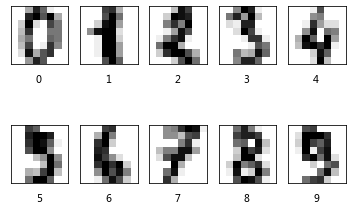

In [103]:
# Vilizating the data
for i in range(1,11):
    plt.subplot(2,5,i)
    plt.imshow(digits.data[i-1].reshape([8,8]),cmap=plt.cm.gray_r)
    plt.text(3,10,str(digits.target[i-1]))
    plt.xticks([])
    plt.yticks([])
plt.show()

In [137]:
# Split the data into training set and test set 
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25)

In [138]:
# reformulate the label. 
# If the digit is smaller than 5, the label is 0.
# If the digit is larger than 5, the label is 1.

y_train[y_train < 5 ] = 0
y_train[y_train >= 5] = 1
y_test[y_test < 5] = 0
y_test[y_test >= 5] = 1

In [133]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1347, 64)
(450, 64)
(1347,)
(450,)


## 4.3 根据3.12测试代码的思路，完成mnist数据集，模型训练过程。

# 5 Congratulations ! You have completed assigment 2. 